In [134]:
total = UKRI_spending['Amount'].sum()
print("Grant total = £", f"{np.round(total):,}")

Grant total = £ 10,526,235,871.0


In [135]:
top_institutes = UKRI_spending.groupby(['Supplier'])['Amount'].sum().sort_values(ascending=False)[0:100]
print("Grant total of top 100 suppliers = £", f"{np.round(top_institutes.values.sum()):,}")

Grant total of top 100 suppliers = £ 9,775,181,525.0


### Group the amounts by supplier to find the total grant values to each institution

In [136]:
institute_grants = UKRI_spending.groupby(['Supplier'])['Amount'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Grant distribution for top 100 suppliers')

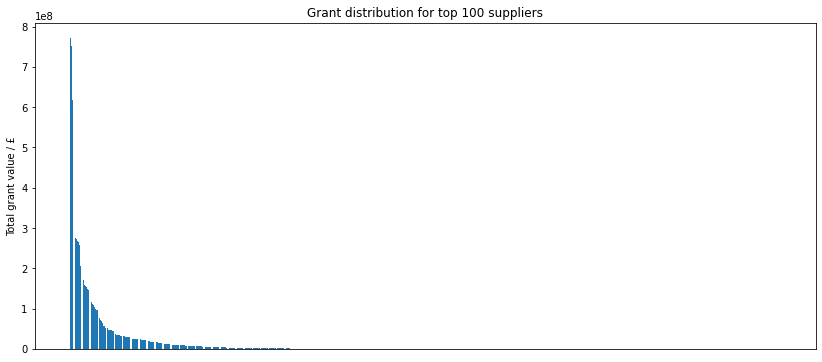

In [138]:
plt.figure(figsize=(14, 6))
plt.bar(institute_grants.index, institute_grants.values)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.ylabel("Total grant value / £")
plt.title("Grant distribution for top 100 suppliers")

### Looking only at the top 50 suppliers

Text(0.5, 1.0, 'Grant distribution for top 50 suppliers')

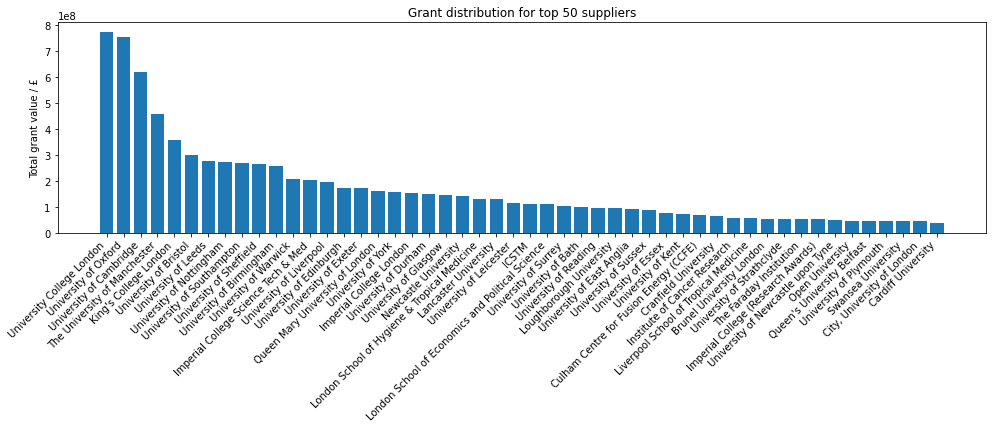

In [139]:
no_of_suppliers = 50
plt.figure(figsize=(14, 6))
ax = plt.bar(top_institutes.index[0:no_of_suppliers], top_institutes.values[0:no_of_suppliers])
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.ylabel("Total grant value / £")
plt.title("Grant distribution for top "+str(no_of_suppliers)+" suppliers")

### Looking into the timings of the grants made to the top 100 institutes (which represents 90% of the total expenditure)

In [140]:
df_top_100 = UKRI_spending[UKRI_spending['Supplier'].isin(list(top_institutes.index))]

<AxesSubplot:xlabel='Date', ylabel='Amount'>

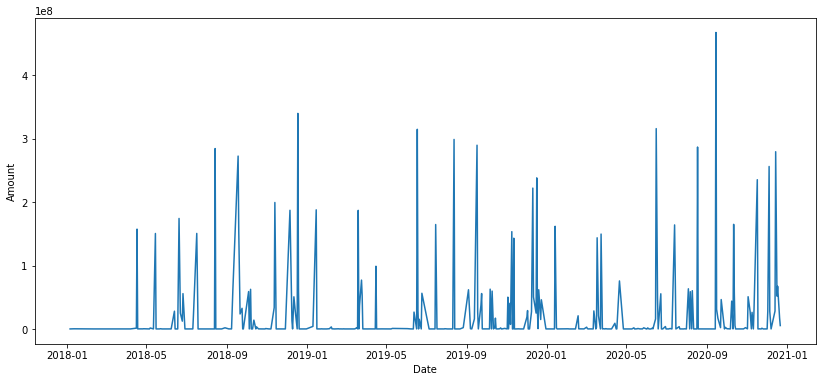

In [141]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top_100.groupby(['Date']).sum(), x="Date", y="Amount")

In [142]:
df_top_100.groupby(['Date']).sum()

,Amount
Date,
2018-01-05,2.521614e+04
2018-01-08,5.188613e+04
2018-01-11,2.296476e+05
2018-02-07,1.270000e+03
2018-02-10,1.837400e+04
...,...
2020-12-15,2.796894e+08
2020-12-17,5.183085e+07
2020-12-18,6.731970e+07


In [143]:
df_top_100.groupby(pd.Grouper(key='Date', axis=0, freq='M')).sum()

,Amount
Date,
2018-01-31,3.067499e+05
2018-02-28,1.964400e+04
2018-03-31,1.104102e+04
2018-04-30,1.595379e+08
2018-05-31,1.526023e+08
2018-06-30,2.953928e+08
2018-07-31,1.739586e+08
2018-08-31,2.866358e+08
2018-09-30,5.437215e+08


<AxesSubplot:xlabel='Date', ylabel='Amount'>

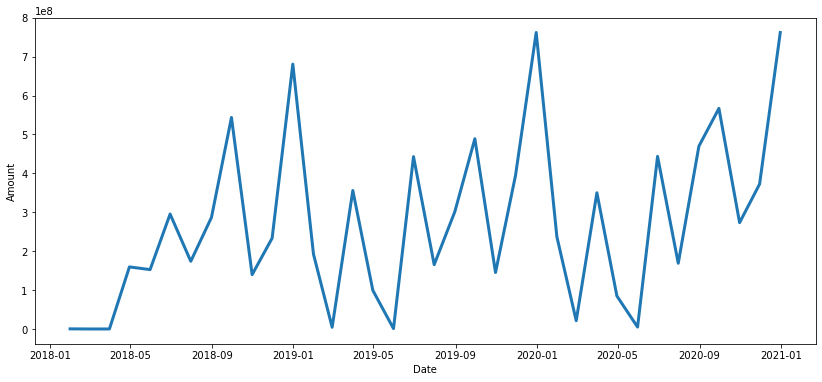

In [144]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top_100.groupby(pd.Grouper(key='Date', axis=0, freq='M')).sum(), x="Date", y="Amount", linewidth=3)

### overlaying different years to see annual cycles

Text(0, 0.5, 'Total grant value / £')

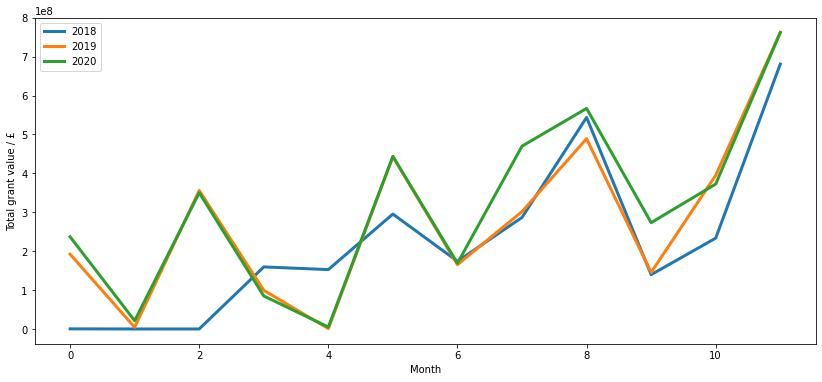

In [145]:
import calendar

calendar.month_abbr[month_number]

plt.figure(figsize=(14, 6))
plt.plot(df_top_100.groupby(pd.Grouper(key='Date', axis=0, freq='M')).sum()[0:12].values, linewidth=3, label="2018")
plt.plot(df_top_100.groupby(pd.Grouper(key='Date', axis=0, freq='M')).sum()[12:24].values, linewidth=3, label="2019")
plt.plot(df_top_100.groupby(pd.Grouper(key='Date', axis=0, freq='M')).sum()[24:36].values, linewidth=3, label="2020")
plt.legend()
plt.xlabel("Month")
plt.ylabel("Total grant value / £")

In [39]:
df_top_100.groupby(pd.Grouper(key='Date', axis=0, freq='Y')).sum()

,Amount
Date,
2018-12-31,2.539952e+09
2019-12-31,3.155762e+09
2020-12-31,3.520094e+09


- funding generally increases throughout the year, and increases year on year

# Finding common entries between the university ranking table, and the UKRI funding data

In [235]:
institute_grants.index = institute_grants.index.str.lower()

In [236]:
institute_scores_df.index = institute_scores_df.index.str.lower()

In [262]:
remove_words_list = ["of", "the", "(", ")", "ucl ", "university", "for"]

institute_scores_df.index = institute_scores_df.index.str.replace('|'.join(remove_words_list), '', regex=True).str.strip()
institute_grants.index = institute_grants.index.str.replace('|'.join(remove_words_list), '', regex=True).str.strip()

In [264]:
common_institutes = list(set(institute_grants.index).intersection(institute_scores_df.index))

In [286]:
final_df = institute_scores_df.join(institute_grants)

In [294]:
final_df.dropna(inplace=True) 

In [412]:
final_df

,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Academic services spend,Facilities spend,Degree completion,Student -staff ratio,Graduate prospects – outcomes,Graduate prospects – on track,Amount
aberdeen,686,182,4.06,2.97,0.73,1744,701,88.5,15.7,74.8,77.2,1.601820e+07
abertay,463,140,4.23,2.16,0.36,1093,686,73.6,22.4,62.2,70.6,2.788469e+06
aberystwyth,605,118,4.29,2.84,0.76,1932,435,85.0,16.0,63.0,70.5,7.159019e+06
anglia ruskin,443,108,4.05,2.37,0.27,1064,420,79.8,20.0,72.8,77.2,1.804805e+07
arts bournemouth,606,144,4.22,2.30,0.13,1424,347,88.4,14.3,57.1,73.9,6.109208e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
winchester,471,108,4.01,2.32,0.30,1239,465,84.3,17.4,62.5,72.1,3.290470e+06
wolverhampton,397,105,4.02,2.31,0.31,1729,329,71.3,17.0,63.6,72.7,1.305757e+07
worcester,530,114,4.14,2.08,0.30,1083,626,85.3,16.9,70.0,79.5,4.405762e+06
york,762,149,4.06,3.17,0.75,1296,603,93.3,13.6,79.6,80.0,1.569628e+08


AttributeError: 'DataFrame' object has no attribute 'name'

In [411]:
final_df.to_csv("final_df.csv")

108 out of 130 possible institues occure in both datasets, a good overlap

# using scikit learn to predict UKRI funding from performance metrics

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA#
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("final_df.csv", index_col=False)
df.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)
df.set_index(["Name"], inplace=True)
df

,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Academic services spend,Facilities spend,Degree completion,Student -staff ratio,Graduate prospects – outcomes,Graduate prospects – on track,Amount
Name,,,,,,,,,,,,
aberdeen,686,182,4.06,2.97,0.73,1744,701,88.5,15.7,74.8,77.2,1.601820e+07
abertay,463,140,4.23,2.16,0.36,1093,686,73.6,22.4,62.2,70.6,2.788469e+06
aberystwyth,605,118,4.29,2.84,0.76,1932,435,85.0,16.0,63.0,70.5,7.159019e+06
anglia ruskin,443,108,4.05,2.37,0.27,1064,420,79.8,20.0,72.8,77.2,1.804805e+07
arts bournemouth,606,144,4.22,2.30,0.13,1424,347,88.4,14.3,57.1,73.9,6.109208e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
winchester,471,108,4.01,2.32,0.30,1239,465,84.3,17.4,62.5,72.1,3.290470e+06
wolverhampton,397,105,4.02,2.31,0.31,1729,329,71.3,17.0,63.6,72.7,1.305757e+07
worcester,530,114,4.14,2.08,0.30,1083,626,85.3,16.9,70.0,79.5,4.405762e+06


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Amount'], axis=1), df['Amount'], test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [9]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

(106, 2)

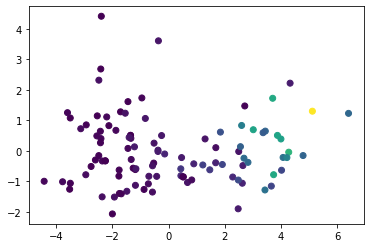

In [13]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=df["Amount"]) 

In [18]:
model = ElasticNetCV()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

results = search.fit(X_train, y_train)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)



ValueError: Invalid parameter alpha for estimator ElasticNetCV(). Check the list of available parameters with `estimator.get_params().keys()`.

In [17]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

ratios = np.arange(0, 1, 0.01)
alphas = [1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, positive=True)
model.fit(X_train, y_train)
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linea

alpha: 0.001000
l1_ratio_: 0.990000


In [383]:
model.score(X_test, y_test)

0.38244423545474293

Poor correlation between uni performance and grant amount, but non-zero

In [387]:
model.predict(X_test)

array([-1.02343219e+07,  1.71746242e+08, -3.52597362e+07,  8.86097657e+07,
        1.36761537e+08,  4.02540395e+07,  1.14795123e+08,  1.48550628e+08,
        9.02124352e+07,  2.01701657e+07,  2.71489908e+08,  2.24037535e+07,
        1.10033909e+08,  2.69681571e+06, -1.31976016e+07,  1.52364016e+08,
        1.42325170e+08,  4.57250130e+06, -3.89057178e+07,  5.32898633e+07,
       -1.90176359e+07,  5.19302575e+07,  2.36503865e+07,  6.51218859e+07,
        1.31769909e+07,  1.65089408e+08,  4.16295911e+07,  6.51451017e+07,
        4.06806009e+07,  1.09655996e+08,  7.20603938e+07, -1.49256895e+07,
       -1.11356958e+08,  1.61411857e+08,  5.25013125e+07])

In [ ]:
#scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#scores = np.absolute(scores)
#print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

#model.fit(X_train, y_train)
#model.score(X_test, y_test)

# Least squares fit

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression(positive=False)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Coefficients: \n", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [-4.65148103e+05  6.02763771e+05 -3.35129593e+07  3.19039724e+07
  7.54544100e+07  2.60045786e+04  3.64659820e+04  3.63322942e+06
 -9.44310570e+06  6.11305134e+06 -4.46994567e+06]
Mean squared error: 6977915372585101.00
Coefficient of determination: 0.45


non negative fit

In [72]:
reg_nnls = LinearRegression(normalize=True, positive=True).fit(X_train, y_train)
y_pred_nnls = reg_nnls.predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("NNLS R2 score", r2_score_nnls)

Mean squared error: 6977915372585101.00
NNLS R2 score 0.4601189176502519


Text(0, 0.5, 'NNLS regression coefficients')

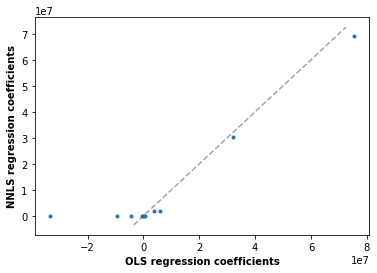

In [69]:
fig, ax = plt.subplots()
ax.plot(reg.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

Text(0, 0.5, 'actual grant values')

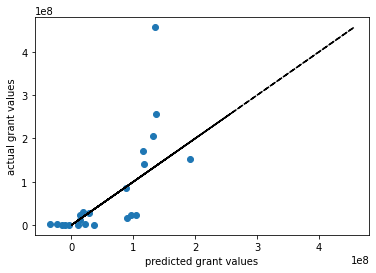

In [70]:
plt.scatter(y_pred_nnls, y_test)
plt.plot(y_test, y_test, "k", linestyle="--")
plt.xlabel("predicted grant values")
plt.ylabel("actual grant values")

# Data exploration

<AxesSubplot:>

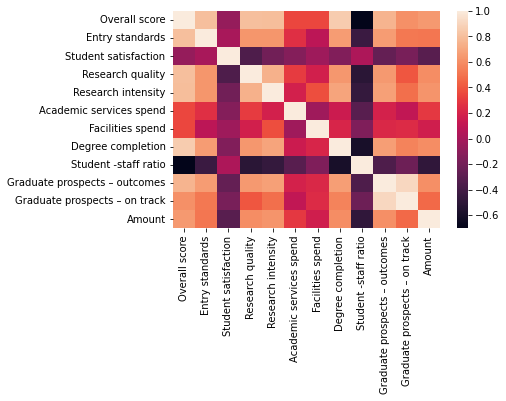

In [46]:
sns.heatmap(df.corr())

In [47]:
df.corr()

,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Academic services spend,Facilities spend,Degree completion,Student -staff ratio,Graduate prospects – outcomes,Graduate prospects – on track,Amount
Overall score,1.000000,0.805706,-0.069461,0.801122,0.798217,0.341924,0.342191,0.859182,-0.705145,0.759987,0.609247,0.646745
Entry standards,0.805706,1.000000,0.003627,0.629653,0.631345,0.258154,0.083467,0.655838,-0.438731,0.660200,0.519360,0.507326
Student satisfaction,-0.069461,0.003627,1.000000,-0.353969,-0.211203,-0.135527,-0.036673,-0.145694,0.025404,-0.265380,-0.184645,-0.317296
Research quality,0.801122,0.629653,-0.353969,1.000000,0.746033,0.304753,0.178333,0.639692,-0.517316,0.640436,0.399149,0.594321
Research intensity,0.798217,0.631345,-0.211203,0.746033,1.000000,0.182702,0.368405,0.688500,-0.468737,0.670261,0.486691,0.620540
Academic services spend,0.341924,0.258154,-0.135527,0.304753,0.182702,1.000000,-0.028391,0.149726,-0.313703,0.192687,0.102136,0.290120
Facilities spend,0.342191,0.083467,-0.036673,0.178333,0.368405,-0.028391,1.000000,0.213954,-0.155949,0.227282,0.237185,0.173733
Degree completion,0.859182,0.655838,-0.145694,0.639692,0.688500,0.149726,0.213954,1.000000,-0.592753,0.662145,0.558479,0.598982
Student -staff ratio,-0.705145,-0.438731,0.025404,-0.517316,-0.468737,-0.313703,-0.155949,-0.592753,1.000000,-0.354975,-0.230112,-0.488297
Graduate prospects – outcomes,0.759987,0.660200,-0.265380,0.640436,0.670261,0.192687,0.227282,0.662145,-0.354975,1.000000,0.912822,0.603199


In [77]:
df2 = df

In [79]:
df2["Amount"] = np.log(df2["Amount"])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['Amount'], axis=1), df2['Amount'], test_size=0.2, random_state=42)

In [83]:
reg_nnls = LinearRegression(normalize=True, positive=True).fit(X_train, y_train)
y_pred_nnls = reg_nnls.predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("NNLS R2 score", r2_score_nnls)

Mean squared error: 9200407725617268.00
NNLS R2 score 0.7240967127274879


Text(0, 0.5, 'actual grant values')

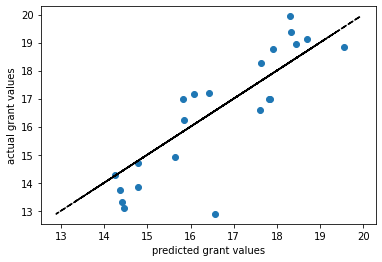

In [84]:
plt.scatter(y_pred_nnls, y_test)
plt.plot(y_test, y_test, "k", linestyle="--")
plt.xlabel("predicted grant values")
plt.ylabel("actual grant values")

In [94]:
pd.merge(np.exp(y_test), pd.Series(np.exp(y_pred_nnls)))

ValueError: Cannot merge a Series without a name

In [ ]:
UKRI_grant